<a href="https://colab.research.google.com/github/owen-wang-student/tensorflow-practice/blob/main/insurance_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retrieve Data

In [20]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [21]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Normalize Data

In [22]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y datasets
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [23]:
X_train.shape, X_train_normal.shape # additional columns are added due to one hot encodings

((1070, 6), (1070, 11))

## Create Model

In [24]:
# Build a neural network fit on our normalized data
tf.random.set_seed(42)

# Create the model
insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_normal.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

# Fit the model
history = insurance_model_normal.fit(X_train_normal, y_train, epochs=200, verbose=0)

## Evaluate Model

In [25]:
# Evaluate out insurance model trained on normalized data (b/c trained on norm data)
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 15ms/step - loss: 3168.1121 - mae: 3168.1121


[3168.112060546875, 3168.112060546875]

## Visualize Model


In [26]:
insurance_model_normal.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1200      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


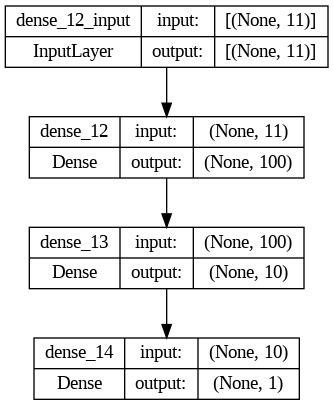

In [27]:
# Visualizing a model's layers
plot_model(model=insurance_model_normal, show_shapes=True)

Text(0.5, 0, 'epochs')

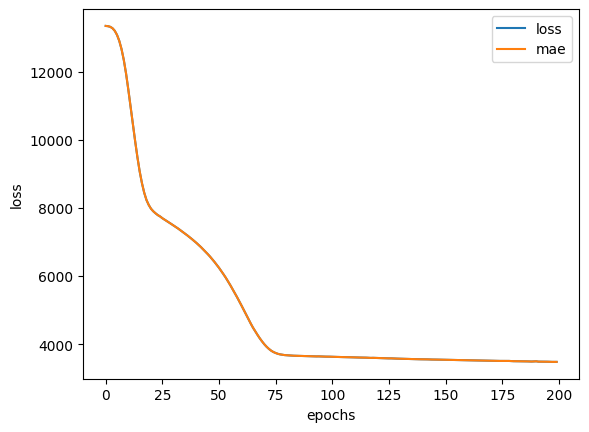

In [28]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Save Model

In [29]:
# Save the model using the HDF5 format (outside of tensorflow env)
insurance_model_normal.save("insurance_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
